Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Clustering </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 15 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar

# Parte 1: Carga y Preprocesamiento de Datos (10 pts.)

## 1.1 Carga de Datos

Para esta tarea deberás trabajar con el dataset de Kaggle [dataset](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download).

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1.2 Descripción del dataset (2 pts.)

¿Qué representan los atributos del dataset? Descríbelo y menciona características generales.

Los atributos del dataset:

0   type : String "red" o "white" que describe el tipo del vino.  
1   fixed acidity : Número que describe la cantidad de ácido tartárico en el vino.  
2   volatile acidity : Número que describe la cantidad de ácido acético en el vino.  
3   citric acid : Número que describe la cantidad de ácido cítrico en el vino.  
4   residual sugar : Número que describe la cantidad de azúcar residual en el vino.  
5   chlorides : Número que describe la cantidad de cloruro en el vino.  
6   free sulfur dioxide : Número que describe la cantidad de dióxido de azufre libre en el vino.  
7   total sulfur dioxide : Número que describe la cantidad de dióxido de azufre total en el vino.  
8   density : Número que describe la densidad del vino.  
9   pH : Número que describe el pH del vino.  
10  sulphates : Número que describe la cantidad de sulfatos en el vino.  
11  alcohol : Número que describe la cantidad de alcohol en el vino.  
12  quality : Número que describe la calidad del vino (entre 0 y 10).  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


## 1.3 Manejo de Variables Cualitativas (2 pts.)

En el set de datos existen columnas con valores no numéricos que deberás manipular antes para poder utilizarlas de buena manera. Para esto utiliza las técnicas vistas en clases

In [5]:
data.replace({'white':1, 'red':0}, inplace=True)

In [6]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


\* Norar que `quality` es una escala numerica de una variable cualitativa, pero al estar numerizada no es necesario tratarla de forma diferente. 

## 1.4 Limpieza del set de datos (4 pts.)

Ahora debes limpiar el set de datos. Para ello deberás emplear técnicas para encontrar valores nulos, outliers, atributos incompletos o características que no sean útiles para el manejo de datos. Recuerda **justificar** tus métodos y decisiones.

### Busqueda de valores nulos

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
# se revisan las filas con valores nulos
data[data.isnull().any(axis=1)].shape[0]/data.shape[0]

0.005233184546713868

debido a lo bajo que es el porcentaje de filas con valores nulos, se eliminaran las filas con datos nulos.

In [9]:
data_ = data.dropna()

### Busqueda de Outliers

In [10]:
X = data_.drop(['quality'], axis=1)
y = data_['quality']

In [11]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X)
scores = lof.negative_outlier_factor_

In [12]:
import numpy as np

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

Debido al alto rango de valores LOF, no es posible ponerlos todos en un plot, por lo que decidí cortar los que estaban bajo el percentil 0.007.

In [13]:
# only use top 95% of the data
threshold = np.quantile(scores, 0.007)
scores_ = np.where(scores > threshold, scores, threshold)
threshold

-2.4001474667988534

In [14]:
scores_.min(), scores_.max(), scores.min(), scores.max()

(-2.4001474667988534,
 -0.8606032326276356,
 -59037960424.409775,
 -0.8606032326276356)

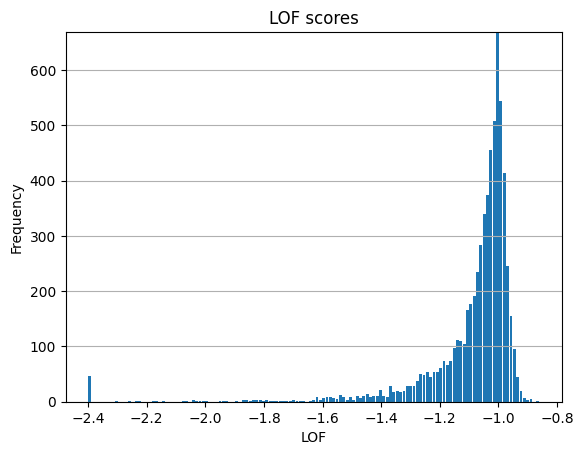

In [15]:
plot_hist(scores_, 'LOF scores')

En base al grafico, se ignoraran los datos con LOF menor a -2.

In [16]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

In [17]:
lof_threshold(-2,scores)

0.009593068234565991

In [18]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0096)
labels = lof.fit_predict(X)

In [19]:
indices = list(np.where(labels==1)[0])
X_ = X.iloc[indices]
y_ = y.iloc[indices]

## 1.5 Normalización de datos (2 pts.)

Normaliza las columnas del set de datos que consideres necesarias. **Justifica** tus decisiones.

Finalmente responde: ¿Por qué es útil normalizar en el caso de un modelo de clustering?

En primer lugar considero necesario visualizar cada columna para definir la normalización.

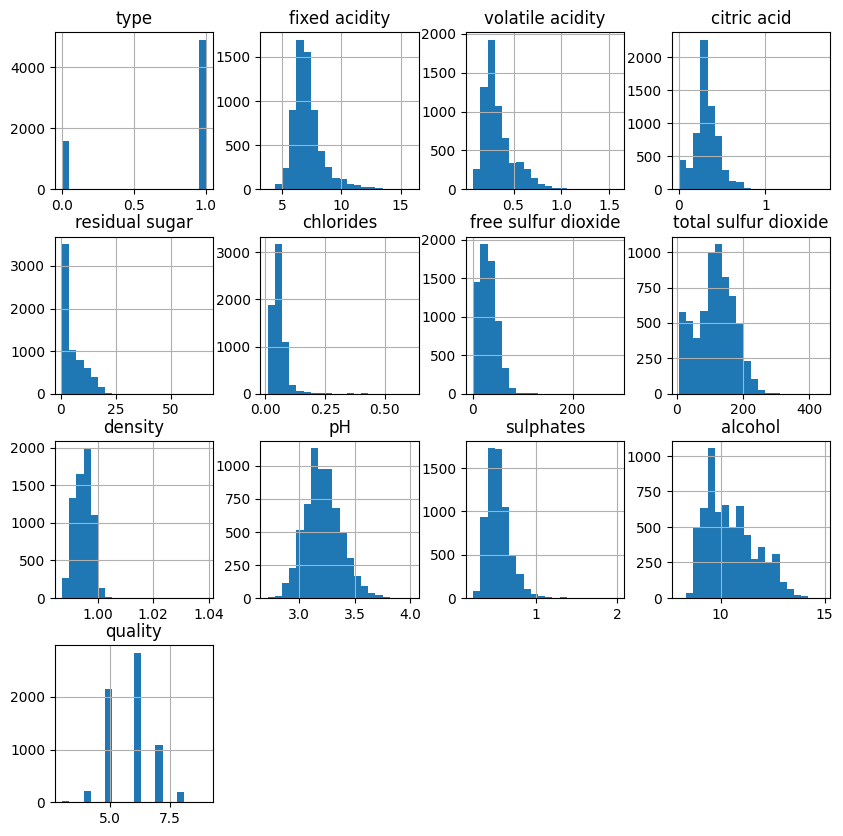

In [20]:
data.hist(bins=20, figsize=(10,10))
plt.show()

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000


Como se puede ver, todas las columnas tienen diferentes rengos, por lo que se normalizarán todas las columnas menos type al ser una variable binaria, y quality que es la categoría a predecir.

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_ = min_max_scaler.fit_transform(X_)

En cuanto a quality, se puede notar que su distribucion en el dataset no es muy uniforme respecto a sus posibles valores, por lo que se binarizara para que tenga una distribución más uniforme.

In [23]:
data_['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [24]:
y_ = y_.apply(lambda y:1 if y>5 else 0)

In [25]:
y_.value_counts()

quality
1    4057
0    2343
Name: count, dtype: int64

# Parte 2: t-SNE y UMAP (14 pts.)

## 2.1 t-SNE (1 pts.)

Define t-SNE con 2 componentes. Justifica la elección del parámetro **perplexity**.

El valor de perplegidad nos dice que tan global o local será la representación de los datos. En este caso, al ser un dataset con 12 columnas, se considera que es un dataset global, por lo que se utilizará un valor de perplegidad de 30.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(0.95) # Mantener un 90% de la varianza
X_pca = pca.fit_transform(X_)
X_pca.shape

(6400, 7)

In [83]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, y, title, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in y.unique():
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        '''
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)
        '''

    ax.set_title(title)
    ax.axis("off")

In [30]:
X_pca.shape

(6400, 7)

In [50]:
from sklearn.manifold import TSNE
tsne_embed = TSNE(n_components=2, perplexity = 7, n_jobs=10)

In [46]:
y_full = y.iloc[indices]

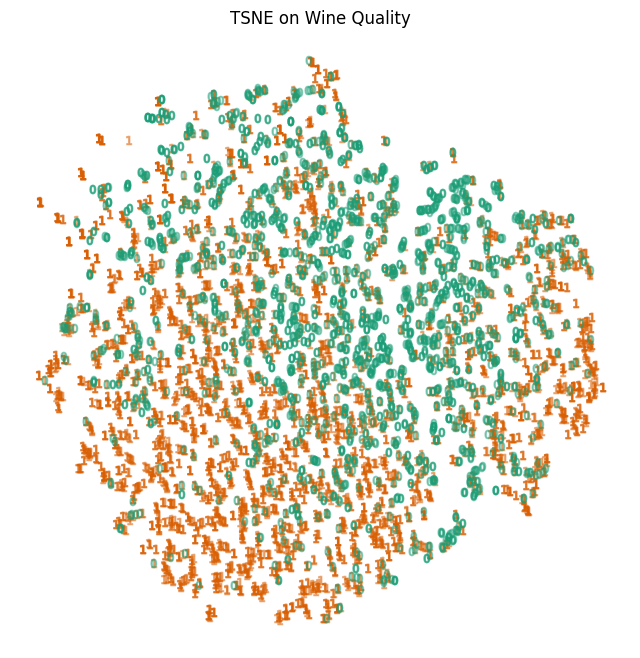

In [53]:
projection_tsne = tsne_embed.fit_transform(X_pca, y_)
plot_embedding(projection_tsne, y_, 'TSNE on Wine Quality')
plt.show()

## 2.2 UMAP (1 pts.)

Define UMAP con 2 componentes. Puedes reducir la cantidad de datos para UMAP si estimas necesario. Justifica la elección de parámetros.

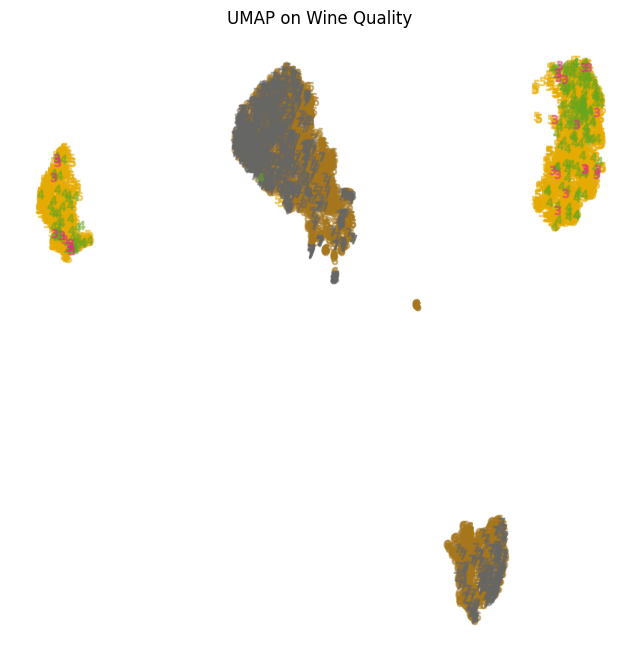

In [57]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 40, n_jobs=8)
projection_umap = umap_2d.fit_transform(X_pca, y_)
plot_embedding(projection_umap,y_full, 'UMAP on Wine Quality')
plt.show()

## 2.3 Visualización en dos dimensiones (6 pts.)

Grafica los embeddings producidos en la sección 2.1 y 2.2. Una vez obtenido los gráficos, responde para cada uno:
* ¿El valor escogido de perplexity puede mejorar? (Solo para t-SNE)
* ¿Crees que se lleve a cabo una buena clusterización?
* ¿Cuántos clusters crees que van a resultar en la mejor clusterización?

Para mostrar los resultados se utilizará la funcion vista en clases, plot_embedding.

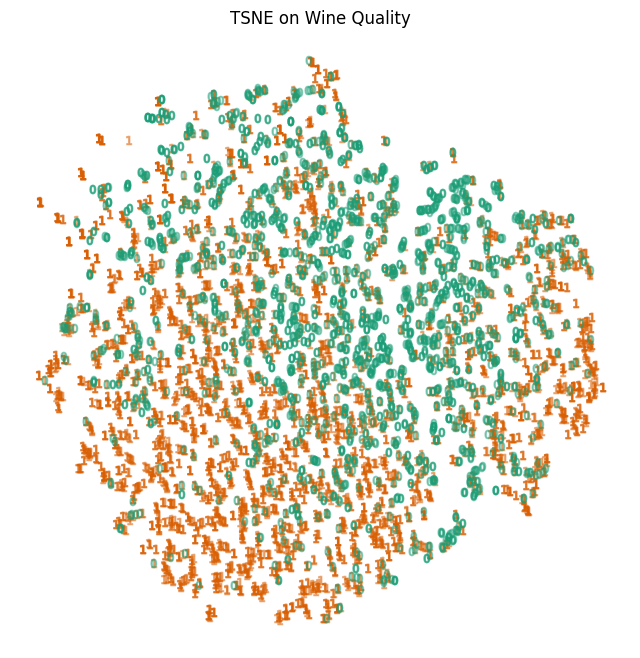

In [60]:
plot_embedding(projection_tsne, y_, 'TSNE on Wine Quality')

### Respuestas

1. Pese a que probe con varios valores para perplexity, considero que aun se podría encontrar un mejor resultado, ya que los datos se ven muy mezclados. De todas formas se puede notar que en la parte superior se juntan los datos con 0 y en la inferior los datos con quality 1.

2. No considero este resultado una buena clusterización ya que no se ven grupos claros separados entre sí.
3. Considero que en el mejor clustering, deberían quedar al menos 3 clusters ya que eran los grupos más prominentes en la columna de calidad. 

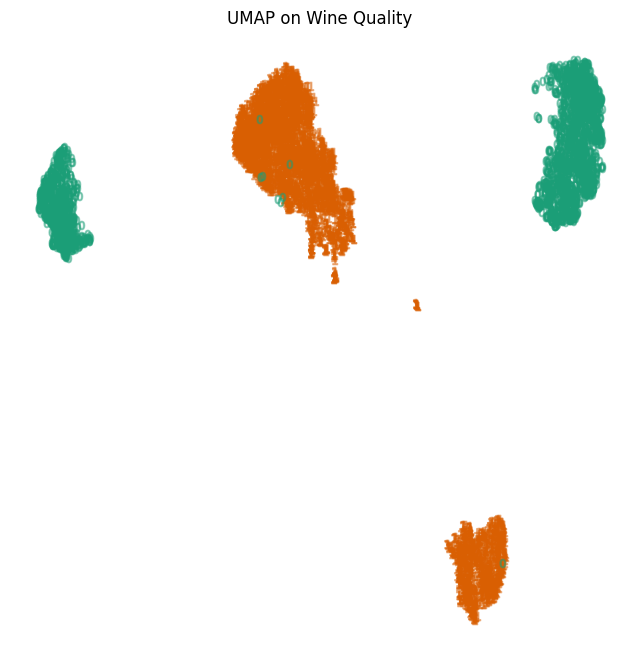

In [58]:
plot_embedding(projection_umap, y_ , 'UMAP on Wine Quality')

### Respuestas

2. Considero que se logran buenos resultados al tener grupos separados y homogeneos con la binarización.

## 2.4 Análisis del algoritmo t-SNE (3 pts.)

Responde: ¿Crees que observar el gráfico de t-SNE te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de t-SNE permiten esto?

Ya que tanto t-SNE como UMAP son diseñados con el objetovo de mantener la estructura global de los datos, normalmente respondería que si. Pero esto se logra en base a la función de costo, ya que tsne utiliza una medida de entropia, donde se considera la distancia entre cada dato.

## 2.5 Análisis del algoritmo UMAP (3 pts.)

Responde: ¿Crees que observar el gráfico de UMAP te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de UMAP permiten esto?

En UMAP se genera un grafo de los datos que es proyectado a 2 dimensiones, por lo que si se mantiene una idea respecto a la estructura original del set de datos, esta tiene mayor correlación que t-SNE.


# Parte 3: K-Means (18 pts.)

En esta sección debes trabajar con los 2 modelos obtenidos en la sección anterior, y crear un nuevo modelo de PCA que retenga el 95% de varianza. Para cada uno deberas:

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]` **(0.5 pt.)**
* Realizar un gráfico ELBOW **(1.5 pts.)**
* Obtener el Silhoutte Score para distintos números de cluster y graficar **(1.5 pts.)**  
* Determinar el número de clusters óptimo **(0.5 pt.)**
* ¿La cantidad de clusters que esperabas coincide con la calculada? ¿Por qué? **(2 pts.)**

**Nota:** Son 6 puntos por modelo, y los puntos se distribuyen como se muestra arriba.


In [65]:
from sklearn.cluster import KMeans

range_k = [2, 3, 4, 5, 6, 7]

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    print(f'k: {k}, inertia: {kmeans.inertia_}')

c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\

k: 2, inertia: 946.9858655479111
k: 3, inertia: 626.0499785406083
k: 4, inertia: 536.9323713356785
k: 5, inertia: 487.82410738614544
k: 6, inertia: 451.5428857975708
k: 7, inertia: 420.83335708629807


c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para k=  2 Silhouette score promedio:  0.5863778089078903
Para k=  3 Silhouette score promedio:  0.4235561049816559
Para k=  4 Silhouette score promedio:  0.34720274467777323
Para k=  5 Silhouette score promedio:  0.2596196702076308
Para k=  6 Silhouette score promedio:  0.2324614104718365
Para k=  7 Silhouette score promedio:  0.20485680376669613


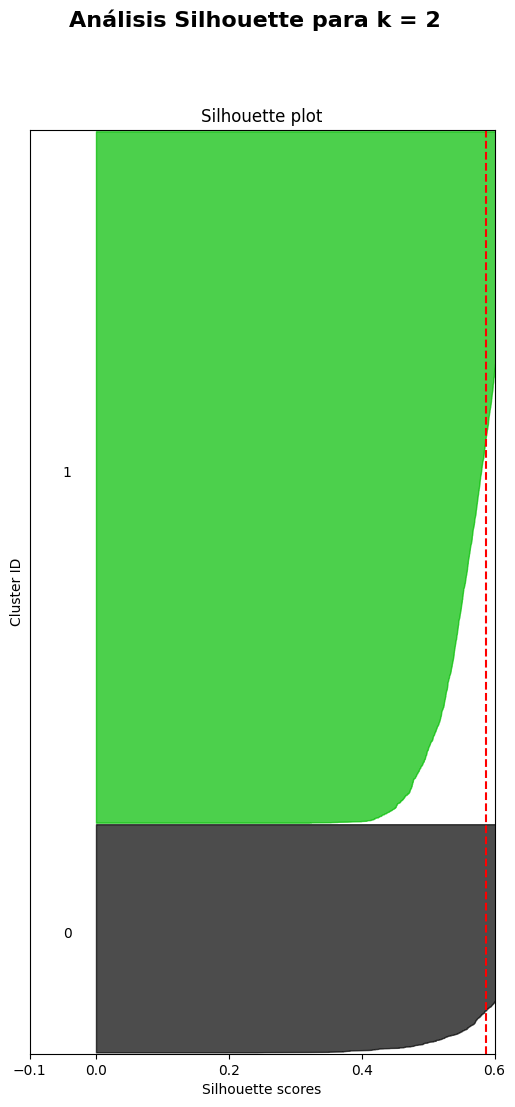

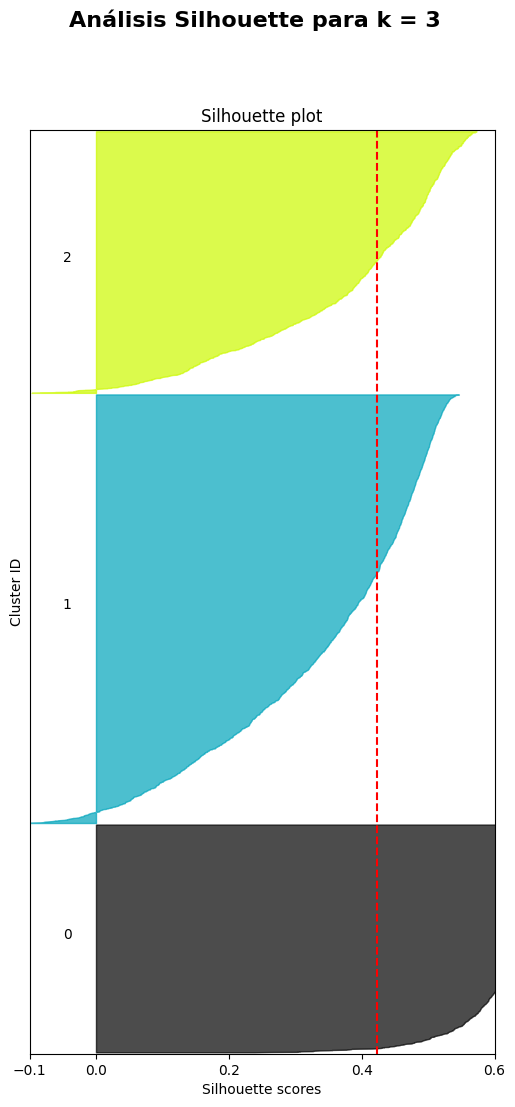

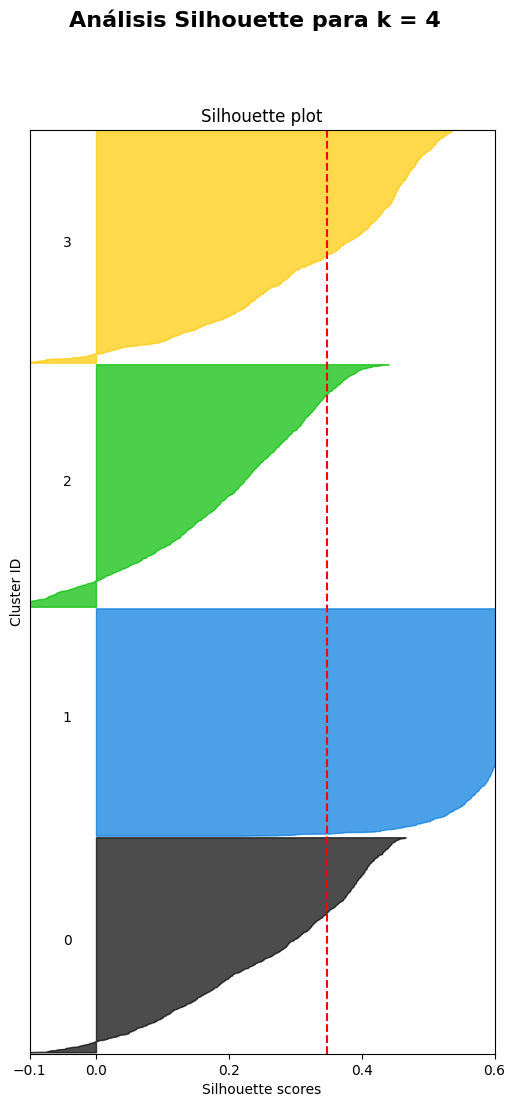

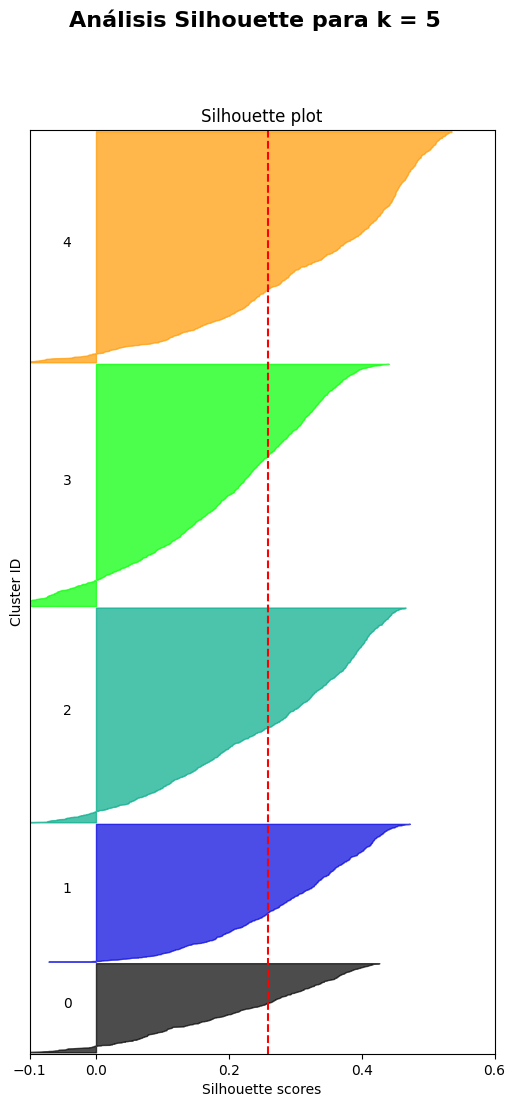

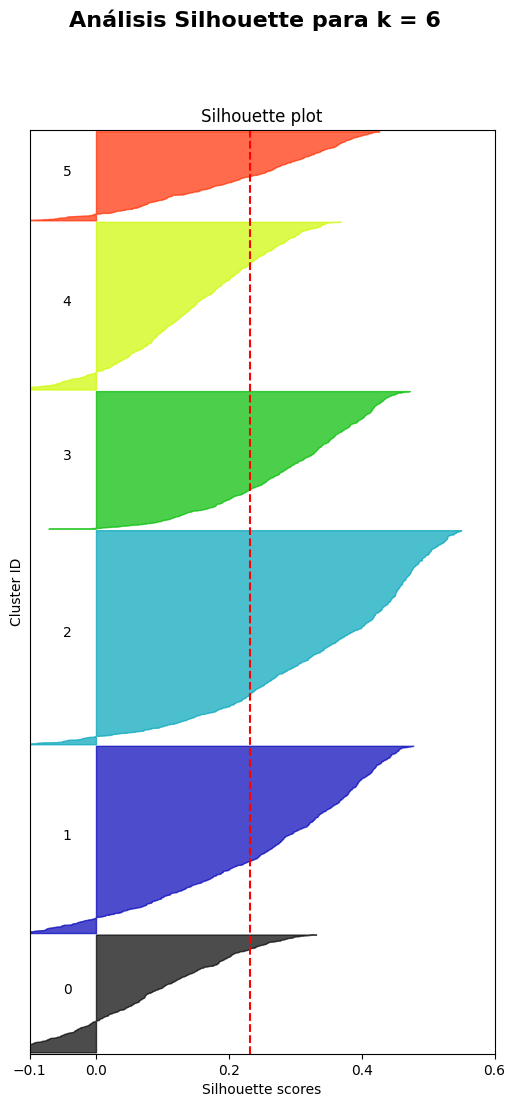

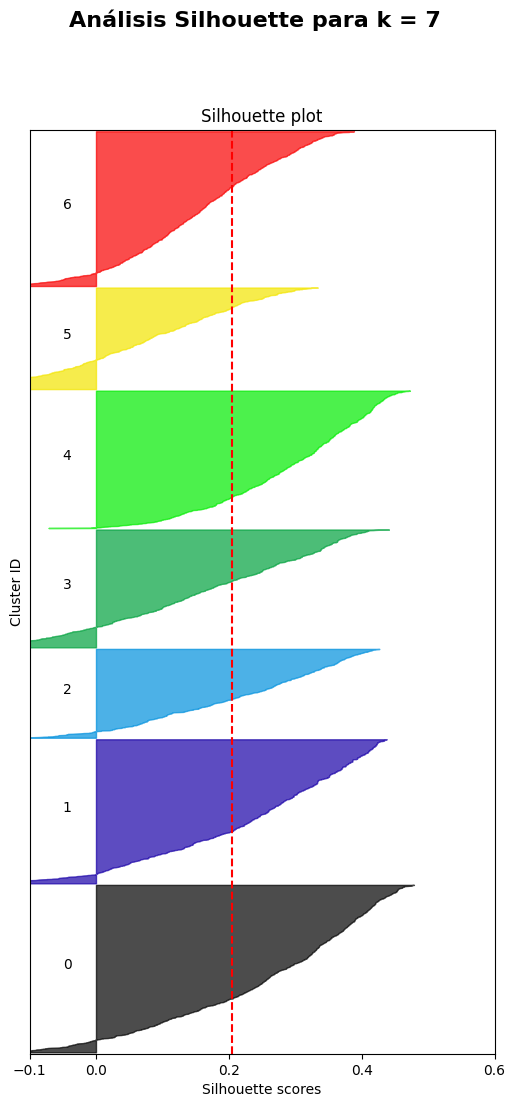

In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


range_k = [2, 3, 4, 5, 6, 7]
distortions = []

for n_clusters in range_k:
    
    fig, ax = plt.subplots(figsize=(6, 12))
    
    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(init="random", n_clusters=n_clusters, n_init=5)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X_pca)

    # Para el grafico ELBOW
    distortions.append(kmeans.inertia_)

    cluster_labels = estimator.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "Para k= ",
        n_clusters,
        "Silhouette score promedio: ",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette scores")
    ax.set_ylabel("Cluster ID")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


    plt.suptitle(
        "Análisis Silhouette para k = %d"
        % n_clusters,
        fontsize=16,
        fontweight="bold",
    )

plt.show()

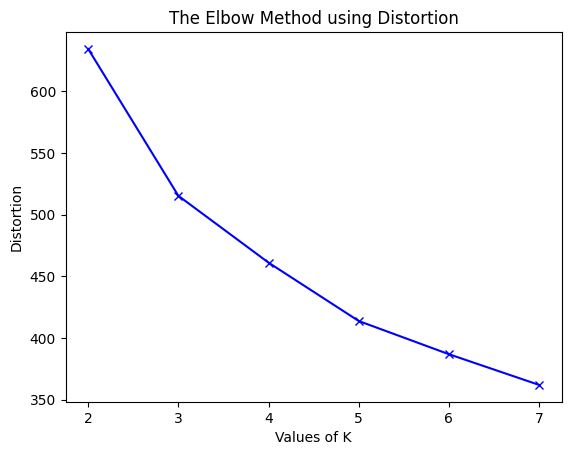

In [67]:

plt.plot(range_k, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

El numero optimo de clusters es 2, ya que obtiene el mayor silhouette score y ningun cluster con datos negativos para silhouette score.

# Parte 4: Graficar y Analizar (18 pts.)

En esta sección se espera que grafiques las clusterizaciones producidas por K-Means. Para ello, considera lo siguiente:
* Se debe utilizar t-SNE y UMAP para visualizar las clusterizaciones en dos dimensiones. (Decide cual de las dos utilizar para mostrar los resultados de PCA) **(3 pts. por cada gráfico)**
* Se recomienda asociar cada punto a un cluster mediante un color distintivo. Para ello se recomienda investigar de `matplotlib.cm`.

Finalmente, analiza los tres gráficos. Compáralos y describe en qué medida se diferencian. Relaciona esto con los modelos que utilizaste. **(9 pts.)**

In [70]:
kmeans = KMeans(init="random", n_clusters=2, n_init=5)
estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X_pca)
cluster_labels = estimator.fit_predict(X_pca)

In [76]:
cluster_labels_ = pd.Series(cluster_labels, name='cluster')

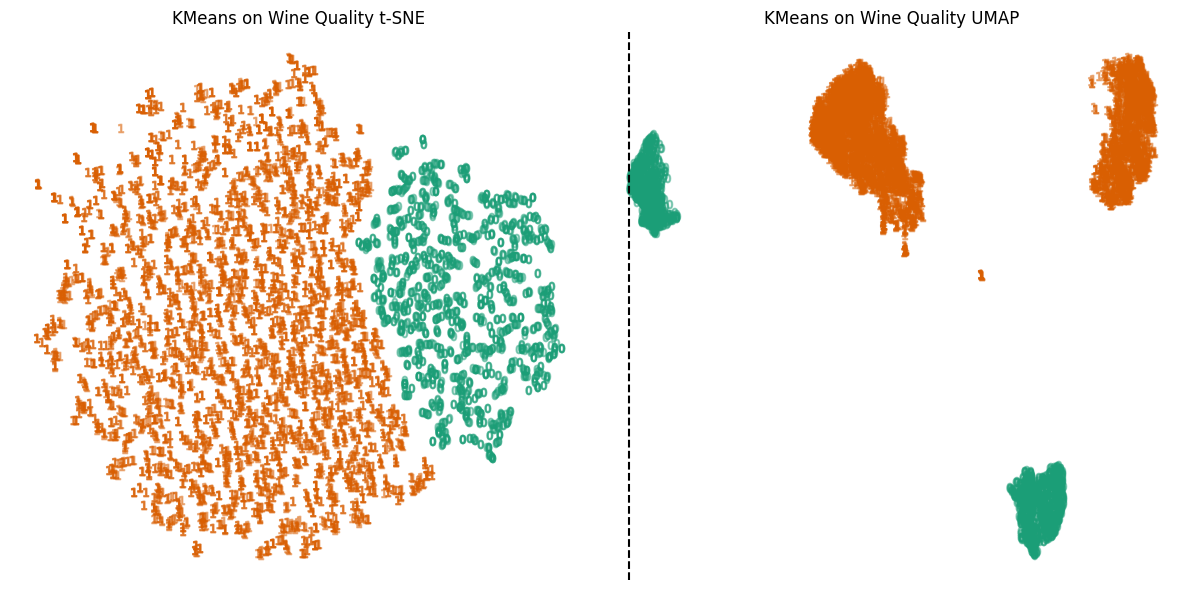

In [97]:
## Plot embeddings side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_embedding(projection_tsne, cluster_labels_, 'KMeans on Wine Quality t-SNE', ax=axes[0])
plt.axvline(color='black', linestyle='--')
plot_embedding(projection_umap, cluster_labels_, 'KMeans on Wine Quality UMAP', ax=axes[1])

plt.tight_layout()
plt.show()

se puede ver que t-SNE y UMAP mantienen la estructura ya que con kMeans, los clusters quedan bastante homogeneos, la problematica es la clasificación de los datos.